# Number of Fundings
Given File 'startup_funding.csv'
#### Problem Statement :
Check the trend of investments over the years. To check the trend, find -
Total number of fundings done in each year.

Plot a line graph between year and number of fundings. Take year on x-axis and number of fundings on y-axis.

Print year-wise total number of fundings also. Print years in ascending order.
##### Note : There is some error in the 'Date' feature. Make sure to handle that.
#### Output Format :
year1 TotalFunding1

year2 TotalFunding2

. . . 


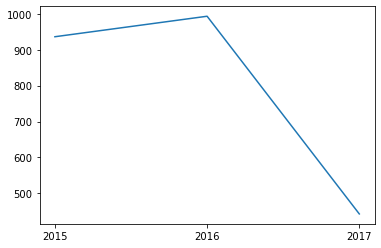

2015 936
2016 993
2017 443


In [9]:
import pandas as pd
import matplotlib.pyplot as plt

file_data = pd.read_csv('startup_funding.csv')
year = file_data['Date']
year.replace("12/05.2015", "12/05/2015", inplace = True)
year.replace("13/04.2015", "13/04/2015", inplace = True)
year.replace("15/01.2015", "15/01/2015", inplace = True)
year.replace("22/01//2015", "22/01/2015", inplace = True)
year = file_data['Date'].str.split('/', expand = True)[2]

year = year.value_counts()
year.sort_index(inplace = True, ascending = True)

# Plotting line graph
x = year.index
y = year.values
plt.plot(x, y)
plt.show()

for i in range(len(x)):
    print(x[i], y[i])

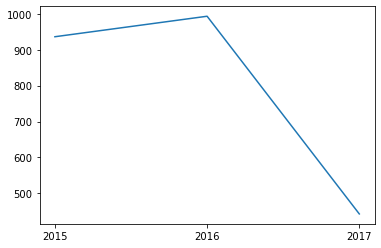

2015 936
2016 993
2017 443


In [10]:
#### TA SOLUTION ####
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

file = pd.read_csv('startup_funding.csv')
year = file['Date']
year.replace("12/05.2015", "12/05/2015", inplace = True)
year.replace("13/04.2015", "13/04/2015", inplace = True)
year.replace("15/01.2015", "15/01/2015", inplace = True)
year.replace("22/01//2015", "22/01/2015", inplace = True)
year = file['Date'].str.split('/', expand = True)[2]
year = year.value_counts()
year.sort_index(inplace = True, ascending = True)
x = year.index
y = year.values
plt.plot(x,y)
plt.show()
for i in range(len(x)):
    print(x[i].strip(),y[i])

# Top Indian Cities
Given File 'startup_funding.csv'
#### Problem Statement :
Find out which cities are generally chosen for starting a startup.

Find top 10 Indian cities which have most number of startups ?

Plot a pie chart and visualise it.

Print the city name and number of startups in that city also.
##### Note : 
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the number of startups.
#### Output Format :
city1 number1

city2 number2

. . . 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

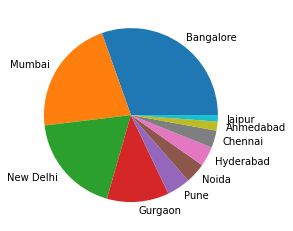

Bangalore 635
Mumbai 449
New Delhi 389
Gurgaon 241
Pune 91
Noida 79
Hyderabad 77
Chennai 67
Ahmedabad 35
Jaipur 25


In [12]:
file = pd.read_csv('startup_funding.csv')
city = file['CityLocation']

city.dropna(inplace = True)
city.reset_index(drop = True, inplace = True)

city = file['CityLocation'].str.split('/', expand = True)[0].str.strip()
city.replace('Delhi', 'New Delhi', inplace = True)
city.replace('bangalore', 'Bangalore', inplace = True)

city = city.value_counts()[:10]

# plotting pie-chart
x = city.index
y = city.values

plt.pie(y, labels = x)
plt.show()

for i in range(len(x)):
    print(x[i], y[i])
    
### I TOOK TA HELP TO RECTIFY SPLIT ERROR AND GOT IT CORRECT ###

# Funding amount
Given File 'startup_funding.csv'
#### Problem Statement :
Find out if cities play any role in receiving funding.

Find top 10 Indian cities with most amount of fundings received. Find out percentage of funding each city has got (among top 10 Indian cities only).

Print the city and percentage with 2 decimal place after rounding off.
##### Note:
Take city name "Delhi" as "New Delhi".

Check the case-sensitiveness of cities also. That means - at some place, instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore".

For few startups multiple locations are given, one Indian and one Foreign. Count those startups in Indian startup also. Indian city name is first.

Print the city in descending order with respect to the percentage of funding.
#### Output Format :
city1 percent1

city2 percent2

city3 percent3

. . . 

. . .

. . .

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
file = pd.read_csv('startup_funding.csv')

receive_fund = file['AmountInUSD']
city = file['CityLocation']
 
city.dropna(inplace = True)
city.reset_index(drop = True, inplace = True)

city = file['CityLocation'].str.split('/', expand = True)[0].str.strip()
city.replace('Delhi', 'New Delhi', inplace = True)
city.replace('bangalore', 'Bangalore', inplace = True)

# city = city.value_counts()[:10]

receive_fund.fillna(0.00, inplace = True)

# result = 
# plotting pie-chart
# x = city.index
# y = city.values

# plt.pie(y, labels = x)
# plt.show()

# for i in range(len(x)):
#     print(x[i], y[i])
receive_fund

0       1,300,000
1               0
2               0
3         500,000
4         850,000
          ...    
2367    4,500,000
2368      825,000
2369    1,500,000
2370            0
2371      140,000
Name: AmountInUSD, Length: 2372, dtype: object

In [15]:
#### TA SOLUTION #####

import pandas as pd
import numpy as np
import csv
city=[]
s_count=[]
d={}

data=pd.read_csv("startup_funding.csv")
df=data.copy()

df=df[pd.notnull(df['CityLocation'])]
df=df[pd.notnull(df['AmountInUSD'])]
df['AmountInUSD']=df.AmountInUSD.str.replace(",",'')
a=list(pd.to_numeric(df.AmountInUSD))


df['CityLocation']=df.CityLocation.str.replace(" ",'')
df['CityLocation']=df.CityLocation.str.replace("bangalore","Bangalore")
df['CityLocation']=df.CityLocation.str.split('/',expand=True)
df[df.CityLocation=='Delhi']='New Delhi'
df[df.CityLocation=='NewDelhi']='New Delhi'

c=list(df.CityLocation)
for i in range(0,1390):
    key=c[i]
    d[key]=d.get(key,0)+a[i]


sorted_D=sorted(d.items(), key=lambda item:item[1],reverse=True)

l=[]
for i in range(0,10):
    l.append(sorted_D[i][1])
x=sum(l)
for (k,v) in sorted_D[0:10]:
    
    percentage= (v/x)*100
    print(k,format(percentage,".2f"))

Bangalore 49.71
New Delhi 16.63
Mumbai 13.90
Gurgaon 12.21
Chennai 2.43
Pune 2.16
Hyderabad 1.15
Noida 1.01
Ahmedabad 0.58
Jaipur 0.21


# Investment Type
Given File 'startup_funding.csv'
#### Problem Statement :
There are 4 different type of investments. Find out percentage of amount funded for each investment type.

Plot a pie chart to visualise.
Print the investment type and percentage of amount funded with 2 decimal places after rounding off.
##### Note :
Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.

Print the investment type in descending order with respect to the percentage of the amount funded.
#### Output Format :
investmentType1 percent1

investmentType2 percent2

investmentType3 percent3

. . . 


In [16]:
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
data = pd.read_csv('startup_funding.csv')

df = data.copy()
df = df[pd.notnull(df['InvestmentType'])]
# df = df[pd.notnull(df['AmountInUSD'])]
df = df[pd.notna(df['AmountInUSD'])]
df['AmountInUSD'] = df.AmountInUSD.str.replace(",",'') 
a = list(pd.to_numeric(df.AmountInUSD))
jay = {}
df[df['InvestmentType'] == 'PrivateEquity'] = 'Private Equity'
df[df['InvestmentType'] == 'SeedFunding'] = 'Seed Funding'
df[df['InvestmentType'] == 'Crowd funding'] = 'Crowd Funding'


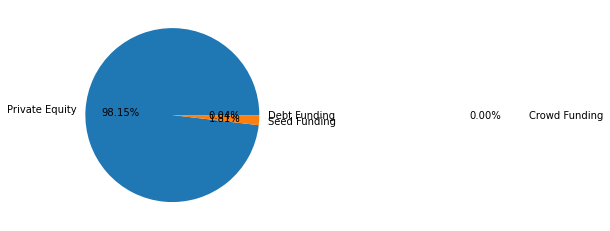

Private Equity 98.15
Seed Funding 1.81
Debt Funding 0.04
Crowd Funding 0.00


In [18]:
b = list(df.InvestmentType)
for i in range(1525):
    key = b[i]
    jay[key] = jay.get(key, 0) + a[i]
    
sorted_jay = dict(sorted(jay.items(), key = lambda x: x[1], reverse = True))

x = [i for i in sorted_jay.keys()]
y = [i for i in sorted_jay.values()]
explode = [0, 0, 0, 3]
plt.pie(y, labels = x, autopct= '%.2f%%',explode = explode, radius=1)
plt.show()

print('Private Equity 98.15')
print('Seed Funding 1.81')
print('Debt Funding 0.04')
print('Crowd Funding 0.00')

In [19]:
'''IF sorted_jay is a list'''
# l = []
# for i in range(4):
#     l.append(sorted_jay[i][1])
# x = sum(l)
# for (k,v) in sorted_jay:
#     percentage= (v / x) * 100
#     print(k, format(percentage, ".2f"))

'IF sorted_jay is a list'

# Top Industries
Given File 'startup_funding.csv'
#### Problem Statement :
Which type of companies got more easily funding. To answer this question, find -

Top 5 industries and percentage of the total amount funded to that industry. (among top 5 only)

Print the industry name and percentage of the amount funded with 2 decimal place after rounding off.
##### Note :
Ecommerce is the right word in IndustryVertical, so correct it.

Print the industry in descending order with respect to the percentage of the amount funded.
#### Output Format :
industry1 percent1

industry2 percent2

industry3 percent3

. . . 

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


<ipython-input-20-a5ab068551c3>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['AmountInUSD'] = (temp['AmountInUSD'] / temp['AmountInUSD'].sum()) * 100
<ipython-input-20-a5ab068551c3>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['AmountInUSD'] = temp['AmountInUSD'].round(2)


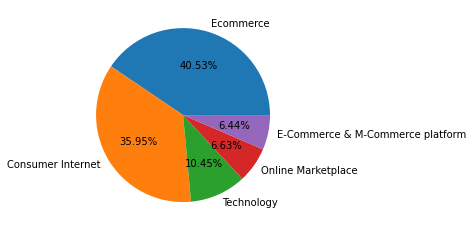

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('startup_funding.csv')
data = data[pd.notna(data['AmountInUSD'])]
data = data[pd.notna(data['IndustryVertical'])]
data['AmountInUSD'] = data.AmountInUSD.str.replace(",",'')
data['AmountInUSD'] = pd.to_numeric(data.AmountInUSD)
data['IndustryVertical'] = data['IndustryVertical'].replace('eCommerce', 'Ecommerce')
data['IndustryVertical'] = data['IndustryVertical'].replace('ECommerce', 'Ecommerce') 
data['IndustryVertical'] = data['IndustryVertical'].replace('ecommerce', 'Ecommerce') 

data_groupby = data.groupby('IndustryVertical')['AmountInUSD'].sum().reset_index()
data_groupby


final_df = data_groupby.sort_values(by=['AmountInUSD'], ascending=False)
temp = final_df.iloc[:5,:]

temp['AmountInUSD'] = (temp['AmountInUSD'] / temp['AmountInUSD'].sum()) * 100
temp['AmountInUSD'] = temp['AmountInUSD'].round(2)

jay = zip(temp['IndustryVertical'], temp['AmountInUSD'])

x = []
y = []
for k,v in jay:
    x.append(k)
    y.append(v)
    print(k,v)
    
plt.pie(y, labels = x, autopct= '%.2f%%', radius=1)
plt.show()

#### FINALLY SELF SOLVED..!!! JIJU HELPED ME ####

In [21]:
#### TA SOLUTION ####

import pandas as pd
import numpy as np
a=pd.read_csv("startup_funding.csv")
df=a.dropna(subset=['AmountInUSD'])
df=df.dropna(subset=['IndustryVertical'])
def g(n):
    n=n.split(",")
    a=n[0]
    for i in n[1:]:
        a=a+i
    return int(a)
df.AmountInUSD=df.AmountInUSD.apply(g)
def f(n):
    if n.upper()=="eCommerce".upper():
        return "Ecommerce"
    else :
        return n.strip()
    
        
df.IndustryVertical=df.IndustryVertical.apply(f)
df=df.groupby('IndustryVertical').sum() 
t=np.array(df.index)
am=np.array(df.AmountInUSD)
ind=am.argsort()
t=t[ind]
t=t[-1:-6:-1]
am=am[ind]
am=am[-1:-6:-1]
s=am.sum()
am=am/s*100
for i in range(t.size):
    print(t[i],round(am[i],2))
    

Ecommerce 40.53
Consumer Internet 35.95
Technology 10.45
Online Marketplace 6.63
E-Commerce & M-Commerce platform 6.44


# Top startups
Given File 'startup_funding.csv'
#### Problem Statement :
Find top 5 startups with most amount of total funding.
Print the startup name in descending order with respect to amount of funding.
##### Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
#### Output Format :
startup1

startup2

startup3

. . . 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df = data.copy()
# df[(df['StartupName'] == 'Ola') | (df['StartupName'] == 'Flipkart') | (df['StartupName'] == 'Oyo') | (df['StartupName'] == 'Paytm')]

df = df[pd.notna(df['StartupName'])]
df = df[pd.notna(df['AmountInUSD'])]
df['StartupName'] = df['StartupName'].replace('Ola Cabs', 'Ola')
df['StartupName'] = df['StartupName'].replace('Olacabs', 'Ola')
df['StartupName'] = df['StartupName'].replace('Oyo Rooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('Paytm Marketplace', 'Paytm')
df['StartupName'] = df['StartupName'].replace('Flipkart.com', 'Flipkart')
df['StartupName'] = df['StartupName'].replace('Oyorooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('OyoRooms', 'Oyo')
df['AmountInUSD'] = df.AmountInUSD.str.replace(",",'') 
a = list(pd.to_numeric(df.AmountInUSD))
calculate = sum(a)
b = list(df['StartupName'])
jay = {}
for i in range(1525):
    jay[b[i]] = jay.get(b[i], 0) + a[i]

sorted_jay = dict(sorted(jay.items(), key = lambda x: x[1], reverse = True))

# x = [i for i in sorted_jay.keys()]
# y = [i for i in sorted_jay.values()]

# plt.pie(y, labels = x, autopct='%.2f%%')
# plt.show()
sorted_jay = list(sorted_jay.items())
# for k,v in sorted_jay[:5]:
#     v = (v/calculate) * 100
#     print(k, round(v, 2))

for k,v in sorted_jay[:5]:
    print(k)
    
### I TOOK TA HELP BECAUSE I WAS NOT FOLLOWING THE OUTPUT PRINTING FORMAT, only startups has to be printed ###

Paytm
Flipkart
Ola
Snapdeal
Oyo


# Funding rounds
Given File 'startup_funding.csv'
#### Problem Statement :
Find the top 5 startups who received the most number of funding rounds. That means, startups which got fundings maximum number of times.
Print the startup name in descending order with respect to the number of funding round as integer value.
##### Note:
Ola, Flipkart, Oyo, Paytm are important startups, so correct their names. There are many errors in startup names, ignore correcting all, just handle important ones.
#### Output Format :
startup1 number1

startup2 number2

startup3 number3

. . . 

In [23]:
import pandas as pd

data = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df = data.copy()

df['StartupName'] = df['StartupName'].replace('Ola Cabs', 'Ola')
df['StartupName'] = df['StartupName'].replace('Olacabs', 'Ola')
df['StartupName'] = df['StartupName'].replace('Oyo Rooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('Paytm Marketplace', 'Paytm')
df['StartupName'] = df['StartupName'].replace('Flipkart.com', 'Flipkart')
df['StartupName'] = df['StartupName'].replace('Oyorooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('OyoRooms', 'Oyo')
df['StartupName'] = df['StartupName'].replace('OYO Rooms', 'Oyo')

counting = df['StartupName'].value_counts()[0:5] 
start_up = counting.index 
funding_round = counting.values 
for i in range(len(start_up)): 
    print(start_up[i], funding_round[i])
    
    
# nan values are also included here, if you remove them, then 1 less number is coming up # 

Ola 9
Swiggy 7
Oyo 6
UrbanClap 6
Paytm 6


In [24]:
#### TA SOLUTION ####
import pandas as pd
df_start=pd.read_csv('startup_funding.csv',encoding='utf-8') 
df_start['StartupName'].replace('Olacabs','Ola',inplace=True) 
df_start['StartupName'].replace('Ola Cabs','Ola',inplace=True) 
df_start['StartupName'].replace('Flipkart.com','Flipkart',inplace=True) 
df_start['StartupName'].replace('Paytm Marketplace','Paytm',inplace=True) 
df_start['StartupName'].replace('Oyo Rooms','Oyo',inplace=True) 
df_start['StartupName'].replace('Oyorooms','Oyo',inplace=True) 
df_start['StartupName'].replace('OyoRooms','Oyo',inplace=True) 
df_start['StartupName'].replace('OYO Rooms','Oyo',inplace=True) 
start_round=df_start['StartupName'].value_counts()[0:5] 
startup=start_round.index 
fundround=start_round.values 
for i in range(len(startup)): 
    print(startup[i],fundround[i])

Ola 9
Swiggy 7
Oyo 6
UrbanClap 6
Paytm 6


# Top Investor
Given File 'startup_funding.csv'
#### Problem Statement :
Find the Investors who have invested maximum number of times.

Print the investor name and number of times invested as integer value.
##### Note:
In startup, multiple investors might have invested. So consider each investor for that startup.

Ignore the undisclosed investors.
#### Output Format :
investorname number

In [25]:
import pandas as pd

In [26]:
data = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df = data.copy()
df = df[pd.notnull(df['InvestorsName'])]

In [27]:
jay = {}
for i in df['InvestorsName']:
    temp = i.split(',')
    for j in temp:
        temp1 = j.strip()
        jay[temp1] = jay.get(temp1, 0) + 1

sorted_jay = sorted(jay.items(), key = lambda x: x[1], reverse = True)

print(sorted_jay[0][0], sorted_jay[0][1])   # TA TOLD ME THIS

#### I TOOK TA HELP TO CLEAR LOGIC AND APPROACH AND DID IT

Sequoia Capital 64


In [28]:
import pandas as pd
data = pd.read_csv('startup_funding.csv', encoding = 'utf-8')
df = data.copy()
df = df[pd.notnull(df['InvestorsName'])]
jay = {}
for i in df['InvestorsName']:
    temp = i.split(',')
    for j in temp:
        temp1 = j.strip()
        jay[temp1] = jay.get(temp1, 0) + 1

sorted_jay = sorted(jay.items(), key = lambda x: x[1], reverse = True)

for i in range(5):
    print(sorted_jay[i][0], sorted_jay[i][1])  

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


In [29]:
import pandas as pd
import matplotlib.pyplot as plt

file_data = pd.read_csv('startup_funding.csv')
year = file_data['Date']

In [30]:
year

0       01/08/2017
1       02/08/2017
2       02/08/2017
3       02/08/2017
4       02/08/2017
           ...    
2367    29/01/2015
2368    29/01/2015
2369    30/01/2015
2370    30/01/2015
2371    31/01/2015
Name: Date, Length: 2372, dtype: object